In [1]:
import rasterio                  # I/O raster data (netcdf, height, geotiff, ...)
import os
import matplotlib.pyplot as plt  # plotting tools
%matplotlib inline
import pickle
import numpy as np
import geopandas as gps
import pandas as pd
import math

In [2]:
dataset_dir=r'J:\5_lakemapping\patchesReshape'
# output_dir=r'D:\lakemapping\2_dataset\output588'
image_fn = 'image'
image_type = '.tif' 
patch_size = (512,512,4)
type_num=6

### 1

In [3]:
dataType='val'
i=0

[]

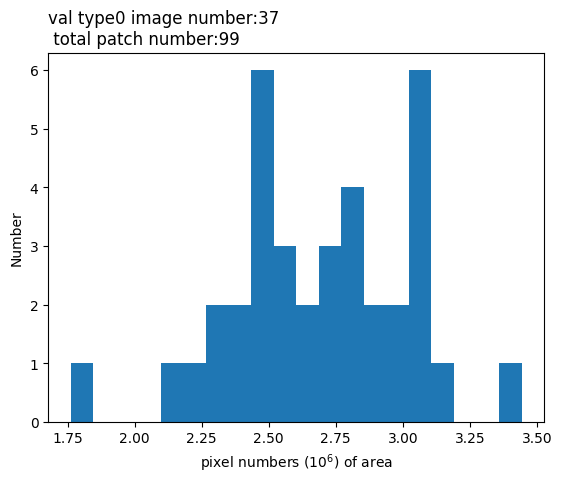

In [14]:
numList=[]
path_to_write=os.path.join(dataset_dir,'{}/type{}'.format(dataType,i))
all_files = os.listdir(path_to_write)
all_files_image = [fn for fn in all_files if fn.startswith(image_fn) and fn.endswith(image_type)]#ndwi.png
for j, fn in enumerate(all_files_image):
    img = rasterio.open(os.path.join(path_to_write, fn))
    read_img = img.read()
    rowNum=read_img.shape[1]/100#patch_size[0]
    colNum=read_img.shape[2]/100#patch_size[1]
    numList.append(rowNum*colNum)
# numList.sort()
x=range(0,len(numList))
plt.hist(numList,bins=20)
plt.xlabel('pixel numbers ($10^6$) of area')
plt.ylabel('Number')
numList=np.array(numList)
plt.title(dataType+' type{} image number:{}\n total patch number:{}'.format(i,len(all_files_image),int(numList.sum())),loc='left')
# plt.ylim(0,80)
# plt.xlim(0,45)
plt.plot()
# fig_name = dataType+'_type{}.png'.format(i)
# plt.savefig(fig_name)
# plt.close()
# i=i+1

### 2

In [81]:
dataType='val'
totalNumList=[]
for i in range(0,type_num):
    numList=[]
    path_to_write=os.path.join(dataset_dir,'{}/type{}'.format(dataType,i))
    all_files = os.listdir(path_to_write)
    all_files_image = [fn for fn in all_files if fn.startswith(image_fn) and fn.endswith(image_type)]#ndwi.png
    for j, fn in enumerate(all_files_image):
        img = rasterio.open(os.path.join(path_to_write, fn))
        read_img = img.read()
        rowNum=read_img.shape[1]/100#/patch_size[0]
        colNum=read_img.shape[2]/100#/patch_size[1]
        numList.append(rowNum*colNum)
    numList.sort()
    totalNumList=totalNumList+numList
    # print('{},{}'.format(len(all_files_image),int(np.array(numList).sum())))
x=range(0,len(totalNumList))
plt.bar(x,totalNumList)
plt.xlabel('area num')
plt.ylabel('patch num per area')
# plt.title(dataType)
# fig_name = dataType+'_area_patch_num_bar.png'.format(i)
# plt.savefig(fig_name)
plt.close()

KeyboardInterrupt: 

### 3

Text(0, 0.5, 'Number')

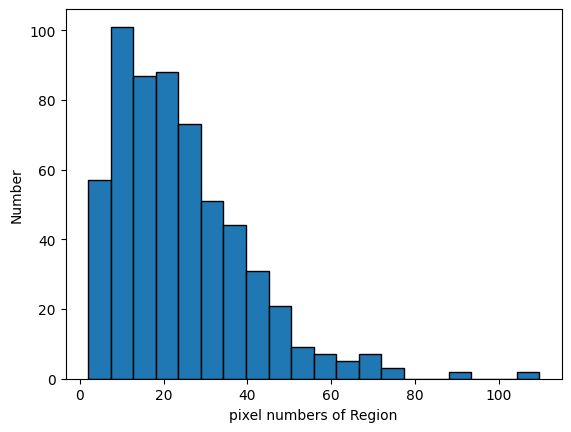

In [20]:
# numList=[]
# for i in range(0,type_num):
#     path_to_write=os.path.join(output_dir,'output{}'.format(i))
#     all_files = os.listdir(path_to_write)
#     all_files_NDWI = [fn for fn in all_files if fn.startswith(NDWI_fn) and fn.endswith(image_type)]#ndwi.png
#     for j, fn in enumerate(all_files_NDWI):
#         NDWI_img = rasterio.open(os.path.join(path_to_write, fn))
#         read_NDWI_img = NDWI_img.read()
#         rowNum=read_NDWI_img.shape[1]/patch_size[0]
#         colNum=read_NDWI_img.shape[2]/patch_size[1]
#         numList.append(rowNum*colNum)
plt.hist(numList,bins=20,histtype='bar',edgecolor="k")
# plt.xscale("log")
plt.xlabel("pixel numbers of Region")
plt.ylabel("Number")

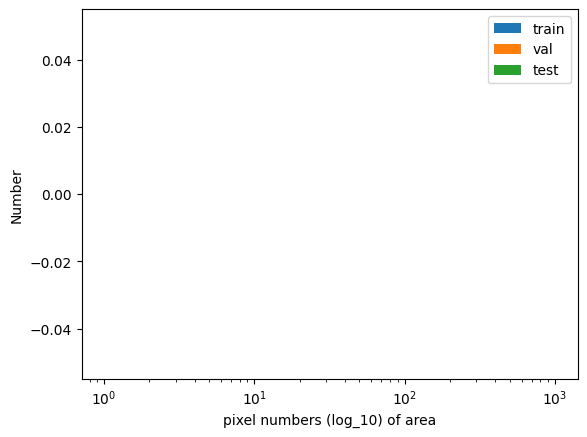

In [82]:
def fun(dataType):
    numList=[]
    for i in range(0,type_num):
        path_to_write=os.path.join(dataset_dir,'{}/type{}'.format(dataType,i))
        all_files = os.listdir(path_to_write)
        all_files_image = [fn for fn in all_files if fn.startswith(image_fn) and fn.endswith(image_type)]#ndwi.png
        for j, fn in enumerate(all_files_image):
            img = rasterio.open(os.path.join(path_to_write, fn))
            read_img = img.read()
            rowNum=read_img.shape[1] #/100 #patch_size[0]
            colNum=read_img.shape[2] #/100 #patch_size[1]
            # numList.append(math.log10(rowNum*colNum))
            numList.append(rowNum*colNum)
    return numList
trainNum=fun("train")
valNum=fun("val")
testNum=fun("test")
plt.hist([trainNum,valNum,testNum],bins=[1,10,100,1000],stacked=True)
plt.xscale("log")
plt.xlabel("pixel numbers (log_10) of area")
plt.ylabel("Number")
plt.legend(['train','val','test'])

In [25]:
# 读取现有history文件
with open(r'D:\lakemapping\3_training\U_Net\notebooks\history\6type_512\history_20231202-2055_AdaDelta_dice_loss_012345_512.txt','rb')as file_pi:
    h_adadelta=pickle.load(file_pi)
# with open(r'D:\lakemapping\U_Net\notebooks\history\6type_588\step_per_epoch=532\new_random_strategy\no_change\history_AdaDelta_dice_loss_512100_16_0123.txt','rb')as file_pi:
#     h_comparision=pickle.load(file_pi)
# with open(r'D:\lakemapping\U_Net\notebooks\history\6type_588\step_per_epoch=532\new_random_strategy\history_adam_dice_loss_512100_16_0123.txt','rb')as file_pi:
#     h_adam=pickle.load(file_pi)

Text(0, 0.5, 'Loss')

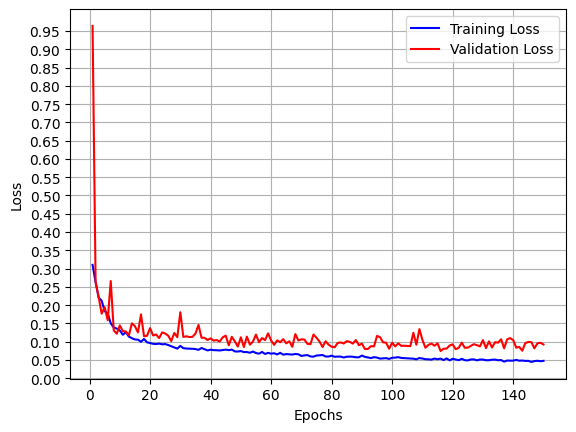

In [32]:
plt.figure()
train_loss =h_adadelta['loss']
val_loss =h_adadelta['val_loss']
# train_loss_adam =h_adam['loss']
# val_loss_adam =h_adam['val_loss']
# x_ticks= np.arange(1, 101,10) 
y_ticks = np.arange(0,1,0.05)
# y_ticks_loss = np.arange(0,0.25,0.05)
epochs = np.arange(1, len(train_loss)+1,1)
# epochs_adam = np.arange(1, len(train_loss_adam)+1,1)
plt.plot(epochs,train_loss, 'b', label='Training Loss')
plt.plot(epochs,val_loss, 'r', label='Validation Loss')
# plt.plot(epochs_adam,train_loss_adam, 'b--', label='Training Loss')
# plt.plot(epochs_adam,val_loss_adam, 'r--', label='Validation Loss')
# plt.grid(color='gray', linestyle='--')
plt.legend()
plt.grid()
# plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlabel('Epochs')
plt.ylabel('Loss')

4

In [3]:
polygon = gps.read_file(r'D:\lakemapping\2_dataset\sampleAnnotations\SampleV4\total_polygon.shp')
polygon

,CLASS_NAME,area,geometry
0,Lake,0.018956,"POLYGON Z ((-66.54333 -2.42330 0.00000, -66.54..."
1,LakeLikeRiver,0.040392,"POLYGON Z ((-66.49653 -2.42321 0.00000, -66.49..."
2,LakeLikeRiver,0.230842,"POLYGON Z ((-66.49959 -2.42312 0.00000, -66.49..."
3,Lake,0.029674,"POLYGON Z ((-66.43051 -2.42132 0.00000, -66.43..."
4,Lake,0.005558,"POLYGON Z ((-66.55762 -2.43021 0.00000, -66.55..."
...,...,...,...
215619,Reservoir,0.000091,"POLYGON Z ((33.02126 24.33500 0.00000, 33.0212..."
215620,Reservoir,0.915970,"POLYGON Z ((33.02135 24.33509 0.00000, 33.0213..."
215621,Lake,10.922107,"POLYGON Z ((102.77293 24.88477 0.00000, 102.77..."
215622,Lake,0.225691,"POLYGON Z ((174.36704 64.65400 0.00000, 174.36..."


Text(15, 10, '8')

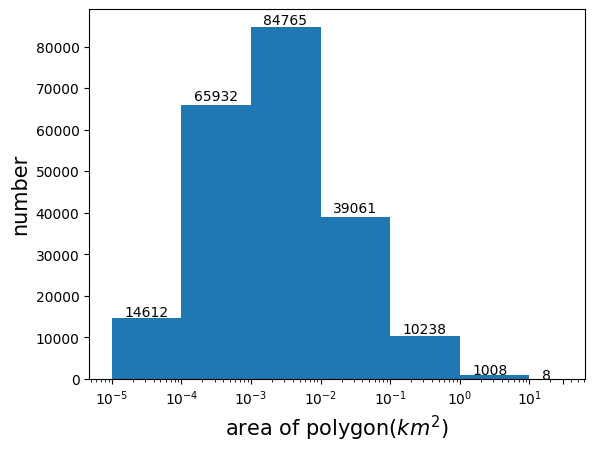

In [39]:
# area=polygon[(polygon['area']<122)&(polygon['area']>0.001)]['area']
# area.plot(x='area',kind='hist',logy=True,xticks=[0,4,6,8,12,16])
plt.hist(polygon['area'],bins=[0.00001,0.0001,0.001,0.01,0.1,1,10,30])
plt.xlabel('area of polygon($km^2$)',fontsize=15)
plt.ylabel('number',fontsize=15)
plt.xscale('log')
plt.xticks([0.00001,0.0001,0.001,0.01,0.1,1,10,30])
# plt.yscale('log')
# plt.grid()
plt.text(0.000015,15000,'14612')
plt.text(0.00015,67000,'65932')
plt.text(0.0015,85500,'84765')
plt.text(0.015,40000,'39061')
plt.text(0.15,11000,'10238')
plt.text(1.5,1000,'1008')
plt.text(15,10,'8')

In [40]:
area = gps.read_file(r'D:\lakemapping\2_dataset\sampleAnnotations\SampleV4\total_area.shp')
area

,id,type,file_name,dataset,area,geometry
0,147,0,147,val,272.920164,"POLYGON Z ((-68.41066 8.78463 0.00000, -68.290..."
1,658,1,658,val,776.032478,"POLYGON Z ((31.02503 9.48872 0.00000, 31.43232..."
2,759,1,759,val,410.263773,"POLYGON Z ((42.59551 0.19709 0.00000, 42.75675..."
3,1319,1,1319,val,498.971301,"POLYGON Z ((-74.35715 -5.10656 0.00000, -74.06..."
4,1402,1,1402_1,val,440.697829,"POLYGON Z ((-66.65428 -2.24516 0.00000, -66.38..."
...,...,...,...,...,...,...
742,18682,0,18682,train,414.393331,"POLYGON Z ((-70.93654 -48.43438 0.00000, -70.6..."
743,18710,5,18710,train,375.745158,"POLYGON Z ((-68.81463 -40.45141 0.00000, -68.6..."
744,18818,2,18818,train,185.891121,"POLYGON Z ((172.52783 -43.44513 0.00000, 172.6..."
745,18856,3,18856,train,192.827160,"POLYGON Z ((-71.99683 -53.30585 0.00000, -71.8..."


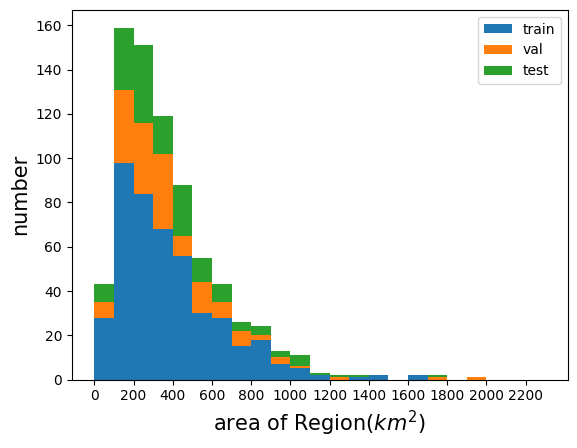

In [47]:
bins=np.arange(0,2400,100)
xtick=np.arange(0,2400,200)
train=area[area['dataset']=='train']['area']
val=area[area['dataset']=='val']['area']
test=area[area['dataset']=='test']['area']
plt.hist([train,val,test],bins=bins,stacked=True)
plt.xlabel('area of Region($km^2$)',fontsize=15)
plt.ylabel('number',fontsize=15)
plt.xticks(xtick)
plt.legend(['train','val','test'])
# plt.xscale('log')
# plt.yscale('log')
# plt.grid()

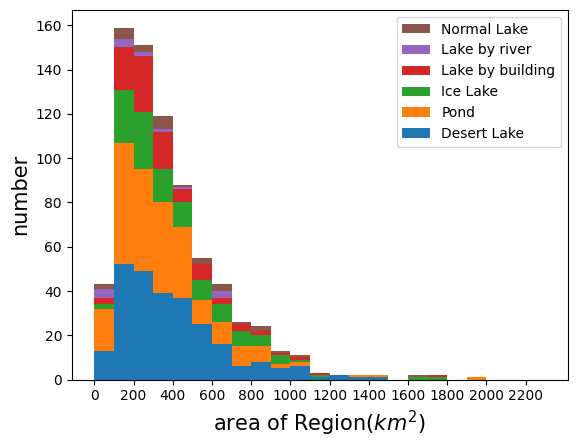

In [58]:
bins=np.arange(0,2400,100)
xtick=np.arange(0,2400,200)
type_area=[]
types=['Normal Lake','Lake by river','Lake by building','Ice Lake','Pond','Desert Lake']
for i in range(6):
    type_area.append(area[area['type']==i]['area'])
    
plt.hist(type_area,bins=bins,stacked=True)
plt.xlabel('area of Region($km^2$)',fontsize=15)
plt.ylabel('number',fontsize=15)
plt.xticks(xtick)
plt.legend(types)
# plt.xscale('log')
# plt.yscale('log')
# plt.grid()

In [53]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
    
        plt.hist(bins[:-1], bins, weights=coun